<a href="https://colab.research.google.com/github/ZahraVakil/OIBSIP_Tasks/blob/main/EmailSPAM_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

##Data Cleaning



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 cols

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
1955,ham,"Aight I'll grab something to eat too, text me ..."
3962,ham,If you ask her or she say any please message.
3124,spam,1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...
4136,ham,Just got to &lt;#&gt;
2138,ham,K still are you loving me.


In [10]:
#renaming the columns

df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
1752,ham,Give one miss from that number please
1957,ham,Take something for pain. If it moves however t...
586,ham,"I dun thk i'll quit yet... Hmmm, can go jazz ?..."
2382,ham,I will reach before ten morning
866,ham,"Same here, but I consider walls and bunkers an..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicate
df = df.drop_duplicates(keep ='first')
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

##2. Exploratory data analysis (EDA)

In [17]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

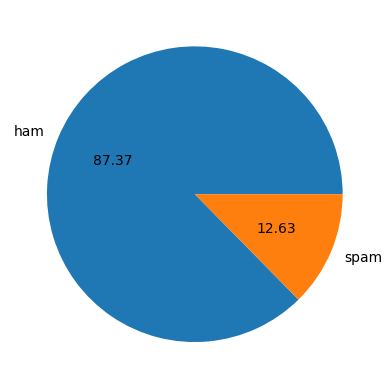

In [19]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels =['ham', 'spam'], autopct= "%0.2f")
plt.show()

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
#no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


##3. Data Preprocessing
*  Lower case
*  Removing stoping words
*   Tokenization
*   Removing special characters
*   stemming




In [43]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
transform_text('Hello, how Are you')

['hello']

In [42]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [45]:
df['transformed_text']= df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##4.Model Building

In [47]:
#first we need to do vectorization -- bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [49]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape

(5169, 6708)

In [51]:
y = df['target'].values

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=2)

In [60]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [61]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
mnb.fit(x_train, y_train)
prediction = mnb.predict(x_test)

print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(precision_score(y_test, prediction))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [63]:
bnb.fit(x_train, y_train)
prediction1 = bnb.predict(x_test)

print(accuracy_score(y_test, prediction1))
print(confusion_matrix(y_test, prediction1))
print(precision_score(y_test, prediction1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
